In [2]:
import os
import sys
sys.path.append('..')
sys.path.append('/Users/jh7685/Documents/Projects/pysurfer')
import pysurfer.freeview_helper as pyview
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import matplotlib.pyplot as plt
import subprocess

warnings.filterwarnings("ignore", category=UserWarning)
%load_ext autoreload
%autoreload 2

# Configurations

In [3]:
nsd_dir ='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset'
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
fs_subj_dir='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer'
overlay_dir='/Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn'
fig_dir='/Volumes/server/Projects/sfp_nsd/derivatives/figures/brain_maps/nsdsyn'

sn_list = [f'subj{sn:02d}' for sn in np.arange(1,9)]

In [4]:
ret_colors = sns.color_palette('Blues_r', as_cmap=True)
ret_colors = np.round(ret_colors(np.linspace(0,1, 8)[::2])[:,0:3]*255).astype(int)
ret_colors = [np.asarray(ret_colors[k, :]) for k in range(3) for _ in range(2)] + [np.asarray(ret_colors[3,:])]

ffas_colors = [np.asarray([0,0,0]), np.asarray([0,0,0])]
ppa_color = [np.asarray([0,0,0])]

label_colors = ret_colors + ffas_colors + ppa_color

In [52]:
[np.asarray([0,0,0])]*3

[array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0])]

In [5]:
labels = ['V1v', 'V1d', 'V2v','V2d', 'V3v','V3d', 'hV4', 'FFA-1', 'FFA-2', 'PPA']
labels = [f'bin-min-0.5_probmap_{roi}_smooth.label' for roi in labels]

# Show Average sfp mask

## sfp map

In [6]:
surf='inflated'
overlay_custom_log = pyview.make_custom_color_palettes_for_overlay(plt.get_cmap('hsv'),
                                                               val_range=(1,128), n=10, log_scale=True)
my_val='mode'
thres=0
ref_frame='absolute'
overlay=f'mask-precision_space-fsaverage_sub-fsaverage_value-{my_val}_thres-{thres}_frame-{ref_frame}.mgz'
save_path = os.path.join(fig_dir, 'ss', f'ss_view-ventral_sub-fsaverage_value-mode_space-fsaverage_masked.mgz')

In [18]:
sn='fsaverage'
label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
save_path = os.path.join(fig_dir, 'ss', f'ss_view-posterior_sub-{sn}_value-mode_space-fsaverage_masked.mgz')

lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
lh_obj = pyview.PyFreeview(fs_subj_dir,
                           sn, 'lh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=lh_labels, label_dir=label_dir)

rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
rh_obj = pyview.PyFreeview(fs_subj_dir,
                           sn, 'rh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=rh_labels, label_dir=label_dir,
                           view='posterior', cam_list=[1.25,0,-25,0], save_path=save_path)
fnl_cm = lh_obj.to_command(
    **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}) + ':offset=-60,0,0' + rh_obj.to_command(
    **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}).split('freeview')[-1] + ' -viewsize 1024 1024'
fnl_cm += ' -colorscale'
os.system(fnl_cm)

sh: freeview: command not found


32512

In [51]:
pyview.extract_info_from_filename(f_name)

{'folder': '/Volumes/server/Projects/sfp_nsd/derivatives/figures/sfp_maps/mgzs/nsdsyn/ss',
 'overlay': 'view-posterior_avg_mask-r2_space-fsaverage_sub-subj01_thres-0_frame-absolute.png'}

## r2 values

In [22]:
surf='inflated'
overlay_custom = pyview.make_custom_color_palettes_for_overlay(plt.get_cmap('coolwarm'),val_range=(-1,1), n=100, log_scale=False)
overlay_custom = '-1200.0,58,76,192,'+overlay_custom
my_val='r2'
thres=0
ref_frame='absolute'
overlay=f"avg_space-fsaverage_sub-fsaverage_value-{my_val}_frame-{ref_frame}.mgz"

## ventral view

In [23]:
label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/fsaverage/label'
save_path = os.path.join(fig_dir, 'ss', f'ss_view-ventral_avg_sub-fsaverage_value-{my_val}_frame-{ref_frame}.mgz')

lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
lh_obj = pyview.PyFreeview(fs_subj_dir,
                           'fsaverage', 'lh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=lh_labels, label_dir=label_dir)

rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
rh_obj = pyview.PyFreeview(fs_subj_dir,
                           'fsaverage', 'rh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=rh_labels, label_dir=label_dir,
                           view='inferior', cam_list=[1.25,0,-30,0], save_path=save_path)
fnl_cm = lh_obj.to_command(
    **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom}) + ':offset=-60,0,0' + rh_obj.to_command(
    **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom}).split('freeview')[-1] + ' -viewsize 1024 1024'
#fnl_cm += ' -colorscale'
subprocess.run(fnl_cm, shell=True, capture_output=False)

CompletedProcess(args='freeview -f /Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/fsaverage/surf/lh.inflated:curvature_method=binary:overlay=/Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.avg_space-fsaverage_sub-fsaverage_value-r2_frame-absolute.mgz:overlay_opacity=1:overlay_custom=-1200.0,58,76,192,-1.0,58,76,192,-0.979798,60,79,195,-0.959596,64,84,199,-0.9393939,66,88,202,-0.9191919,70,93,207,-0.8989899,72,96,209,-0.8787879,76,102,214,-0.8585859,80,107,218,-0.8383838,82,110,220,-0.8181818,86,115,224,-0.7979798,88,118,226,-0.7777778,92,123,229,-0.7575758,96,128,232,-0.7373737,99,131,234,-0.7171717,103,136,237,-0.6969697,105,139,239,-0.6767677,109,144,241,-0.6565657,112,147,243,-0.6363636,116,151,245,-0.6161616,120,155,247,-0.5959596,123,158,248,-0.5757576,127,162,250,-0.5555556,130,165,251,-0.5353535,134,169,252,-0.5151515,138,173,253,-0.4949495,141,175,253,-0.4747475,145,179,254,-0.4545455,148,181,254,-0.4343434,152,185,254,-0.4141414

## posterior view

In [24]:
label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/fsaverage/label'
save_path = os.path.join(fig_dir, 'ss', f'ss_view-posterior_avg_sub-fsaverage_value-{my_val}_frame-{ref_frame}.mgz')

lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
lh_obj = pyview.PyFreeview(fs_subj_dir,
                           'fsaverage', 'lh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=lh_labels, label_dir=label_dir)

rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
rh_obj = pyview.PyFreeview(fs_subj_dir,
                           'fsaverage', 'rh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=rh_labels, label_dir=label_dir,
                           view='posterior', cam_list=[1.25,0,-25,0], save_path=save_path)
fnl_cm = lh_obj.to_command(
    **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom}) + ':offset=-60,0,0' + rh_obj.to_command(
    **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom}).split('freeview')[-1] + ' -viewsize 1024 1024'
#fnl_cm += ' -colorscale'
subprocess.run(fnl_cm, shell=True, capture_output=False)

CompletedProcess(args='freeview -f /Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/fsaverage/surf/lh.inflated:curvature_method=binary:overlay=/Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.avg_space-fsaverage_sub-fsaverage_value-r2_frame-absolute.mgz:overlay_opacity=1:overlay_custom=-1200.0,58,76,192,-1.0,58,76,192,-0.979798,60,79,195,-0.959596,64,84,199,-0.9393939,66,88,202,-0.9191919,70,93,207,-0.8989899,72,96,209,-0.8787879,76,102,214,-0.8585859,80,107,218,-0.8383838,82,110,220,-0.8181818,86,115,224,-0.7979798,88,118,226,-0.7777778,92,123,229,-0.7575758,96,128,232,-0.7373737,99,131,234,-0.7171717,103,136,237,-0.6969697,105,139,239,-0.6767677,109,144,241,-0.6565657,112,147,243,-0.6363636,116,151,245,-0.6161616,120,155,247,-0.5959596,123,158,248,-0.5757576,127,162,250,-0.5555556,130,165,251,-0.5353535,134,169,252,-0.5151515,138,173,253,-0.4949495,141,175,253,-0.4747475,145,179,254,-0.4545455,148,181,254,-0.4343434,152,185,254,-0.4141414

## individual maps

In [36]:
surf='inflated'
overlay_custom = pyview.make_custom_color_palettes_for_overlay(plt.get_cmap('coolwarm'),val_range=(-1,1), n=100, log_scale=False)
overlay_custom = '-1200.0,58,76,192,'+overlay_custom
my_val='r2'
thres=0
ref_frame='absolute'
labels = ['V1v', 'V1d', 'V2v','V2d', 'V3v','V3d', 'hV4', 'aFFA', 'pFFA', 'PPA']
labels = [f'{roi}.label' for roi in labels]

In [37]:
for sn in sn_list[1:]:
    overlay_file=f'mask-precision_sub-{sn}_value-{my_val}_thres-{thres}_frame-{ref_frame}.mgz'
    label_dir=os.path.join(fs_subj_dir, sn, 'label')
    save_path = os.path.join(fig_dir, 'ss', f'ss_view-ventral_sub-{sn}_value-{my_val}.mgz')
    lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf, labels=lh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir)

    rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf, labels=rh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir,
                               view='inferior', cam_list=[1.25,0,-35,0], save_path=save_path)
    fnl_cm = lh_obj.to_command(
        **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom}) + ':offset=-60,0,0' + rh_obj.to_command(
        **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom}).split('freeview')[-1] + ' -viewsize 1024 1024'
#    fnl_cm += ' -colorscale'
    subprocess.run(fnl_cm, shell=True)

# Show individual sfp map

In [19]:
labels = ['V1v', 'V1d', 'V2v','V2d', 'V3v','V3d', 'hV4', 'aFFA', 'pFFA', 'PPA']
labels = [f'{roi}.label' for roi in labels]

In [35]:
for sn in sn_list[1:]:
    overlay_file=f'sub-{sn}_value-mode_masked.mgz'
    label_dir=os.path.join(fs_subj_dir, sn, 'label')
    save_path = os.path.join(fig_dir, 'ss', f'ss_view-ventral_sub-{sn}_value-mode_masked.mgz')
    lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf, labels=lh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir)

    rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf, labels=rh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir,
                               view='inferior', cam_list=[1.25,0,-35,0], save_path=save_path)
    fnl_cm = lh_obj.to_command(
        **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}) + ':offset=-60,0,0' + rh_obj.to_command(
        **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}).split('freeview')[-1] + ' -viewsize 1024 1024'
    fnl_cm += ' -colorscale'
    os.system(fnl_cm)

NaN found at voxel (1, 0, 0, 0)
NaN found at voxel (131802, 0, 0, 0)
NaN found at voxel (143784, 0, 0, 0)
NaN found at voxel (95856, 0, 0, 0)
NaN found at voxel (35946, 0, 0, 0)
NaN found at voxel (23964, 0, 0, 0)
NaN found at voxel (227652, 0, 0, 0)
NaN found at voxel (11985, 0, 0, 0)
NaN found at voxel (191709, 0, 0, 0)
NaN found at voxel (191709, 0, 0, 0)


error: WARNING: 207699 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj02_value-mode_masked.mgz...

error: WARNING: 202129 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj02_value-mode_masked.mgz...



NaN found at voxel (43, 0, 0, 0)
NaN found at voxel (144502, 0, 0, 0)
NaN found at voxel (144502, 0, 0, 0)


error: WARNING: 218588 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj03_value-mode_masked.mgz...

QThread: Destroyed while thread is still running
/Applications/freesurfer/7.2.0/bin/freeview: line 2: 16551 Abort trap: 6           $FREESURFER_HOME/Freeview.app/Contents/MacOS/freeview "$@"
QThread: Destroyed while thread is still running
/Applications/freesurfer/7.2.0/bin/freeview: line 2: 16629 Abort trap: 6           $FREESURFER_HOME/Freeview.app/Contents/MacOS/freeview "$@"


In [29]:
for sn in sn_list:
    overlay_file=f'sub-{sn}_value-mode_masked.mgz'
    label_dir=os.path.join(fs_subj_dir, sn, 'label')
    save_path = os.path.join(fig_dir, 'ss', f'ss_view-posterior_sub-{sn}_value-mode_masked.mgz')
    lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf, labels=lh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir)

    rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf, labels=rh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir,
                               view='posterior', cam_list=[1.25,0,-25,0], save_path=save_path)
    fnl_cm = lh_obj.to_command(
        **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}) + ':offset=-60,0,0' + rh_obj.to_command(
        **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}).split('freeview')[-1] + ' -viewsize 1024 1024'
    fnl_cm += ' -colorscale'
    os.system(fnl_cm)

NaN found at voxel (181617, 0, 0, 0)
NaN found at voxel (215670, 0, 0, 0)
NaN found at voxel (90810, 0, 0, 0)
NaN found at voxel (34055, 0, 0, 0)
NaN found at voxel (45406, 0, 0, 0)
NaN found at voxel (68, 0, 0, 0)
NaN found at voxel (22703, 0, 0, 0)
NaN found at voxel (136213, 0, 0, 0)
NaN found at voxel (136213, 0, 0, 0)


error: WARNING: 195641 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj01_value-mode_masked.mgz...

error: WARNING: 194545 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj01_value-mode_masked.mgz...



NaN found at voxel (1, 0, 0, 0)
NaN found at voxel (143784, 0, 0, 0)
NaN found at voxel (191709, 0, 0, 0)
NaN found at voxel (191709, 0, 0, 0)


error: WARNING: 207699 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj02_value-mode_masked.mgz...

error: WARNING: 202129 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj02_value-mode_masked.mgz...



NaN found at voxel (43, 0, 0, 0)
NaN found at voxel (192666, 0, 0, 0)
NaN found at voxel (96336, 0, 0, 0)
NaN found at voxel (144502, 0, 0, 0)
NaN found at voxel (48171, 0, 0, 0)
NaN found at voxel (48171, 0, 0, 0)



error: WARNING: 218588 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj03_value-mode_masked.mgz...

error: WARNING: 217427 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj03_value-mode_masked.mgz...



NaN found at voxel (182799, 0, 0, 0)
NaN found at voxel (137100, 0, 0, 0)
NaN found at voxel (80, 0, 0, 0)
NaN found at voxel (91400, 0, 0, 0)
NaN found at voxel (91400, 0, 0, 0)



error: WARNING: 207141 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj04_value-mode_masked.mgz...

error: WARNING: 204213 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj04_value-mode_masked.mgz...



NaN found at voxel (16, 0, 0, 0)
NaN found at voxel (158078, 0, 0, 0)
NaN found at voxel (118560, 0, 0, 0)
NaN found at voxel (118560, 0, 0, 0)


error: WARNING: 179767 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj05_value-mode_masked.mgz...

error: WARNING: 177288 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj05_value-mode_masked.mgz...



NaN found at voxel (2, 0, 0, 0)
NaN found at voxel (38046, 0, 0, 0)
NaN found at voxel (152184, 0, 0, 0)
NaN found at voxel (25364, 0, 0, 0)
NaN found at voxel (50728, 0, 0, 0)
NaN found at voxel (190229, 0, 0, 0)
NaN found at voxel (139502, 0, 0, 0)
NaN found at voxel (12686, 0, 0, 0)
NaN found at voxel (240953, 0, 0, 0)
NaN found at voxel (202910, 0, 0, 0)
NaN found at voxel (202910, 0, 0, 0)


error: WARNING: 236706 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj06_value-mode_masked.mgz...

error: WARNING: 236593 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj06_value-mode_masked.mgz...



NaN found at voxel (29817, 0, 0, 0)
NaN found at voxel (168956, 0, 0, 0)
NaN found at voxel (59634, 0, 0, 0)
NaN found at voxel (188832, 0, 0, 0)
NaN found at voxel (19878, 0, 0, 0)
NaN found at voxel (9939, 0, 0, 0)
NaN found at voxel (149080, 0, 0, 0)
NaN found at voxel (119266, 0, 0, 0)
NaN found at voxel (109328, 0, 0, 0)
NaN found at voxel (178894, 0, 0, 0)
NaN found at voxel (79512, 0, 0, 0)
NaN found at voxel (69573, 0, 0, 0)
NaN found at voxel (39756, 0, 0, 0)
NaN found at voxel (89451, 0, 0, 0)
NaN found at voxel (139142, 0, 0, 0)
NaN found at voxel (159018, 0, 0, 0)
NaN found at voxel (5, 0, 0, 0)
NaN found at voxel (5, 0, 0, 0)
, 0)


error: WARNING: 177633 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj07_value-mode_masked.mgz...

error: WARNING: 179012 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj07_value-mode_masked.mgz...



NaN found at voxel (179492, 0, 0, 0)
NaN found at voxel (213146, 0, 0, 0)
NaN found at voxel (201928, 0, 0, 0)
NaN found at voxel (0, 0, 0, 0)
NaN found at voxel (134620, 0, 0, 0)
NaN found at voxel (22438, 0, 0, 0)
NaN found at voxel (11219, 0, 0, 0)
NaN found at voxel (123402, 0, 0, 0)
NaN found at voxel (89748, 0, 0, 0)
NaN found at voxel (33657, 0, 0, 0)
NaN found at voxel (157056, 0, 0, 0)
NaN found at voxel (157056, 0, 0, 0)


error: WARNING: 213855 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj08_value-mode_masked.mgz...

error: WARNING: 212577 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj08_value-mode_masked.mgz...



# Save colorbar in log scale separately

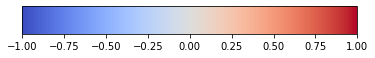

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# Create a colormap
cmap = mpl.cm.coolwarm

# Create a Normalize object which maps values to the [0, 1] interval
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

# Create a ScalarMappable and initialize a data structure
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create the colorbar
cbar = plt.colorbar(sm, cax=ax, orientation='horizontal')

plt.savefig(os.path.join(fig_dir, 'colorbar_image.png'), bbox_inches='tight')

In [49]:
thres=(0.1, 13)
overlay_custom=None
for sn in subj_list[1:2]:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_method-curvefit_value-mode.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-ventral_sub-{sn}_method-curvefit_value-mode.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=[1.25,0,-30,0], save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024'
    os.system(fnl_cm)


In [51]:
thres=(0.5, 10)
overlay_custom=None
for sn in subj_list:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_method-curvefit_value-sigma.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-ventral_sub-{sn}_method-curvefit_value-sigma.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=[1.25,0,-30,0], save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024'
    os.system(fnl_cm)


In [52]:
thres=(1, 10)
overlay_custom=None
for sn in subj_list:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_method-curvefit_value-amp.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-ventral_sub-{sn}_method-curvefit_value-amp.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=[1.25,0,-30,0], save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024'
    os.system(fnl_cm)


In [24]:
thres=(2,4)
overlay_custom=None
for sn in subj_list[:1]:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_stat-anova_value-F.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-ventral_sub-{sn}_stat-anova_value-F.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=[1.25,0,-30,0], save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024'
    os.system(fnl_cm)


In [25]:

thres=(2,4)
overlay_custom=None
for sn in subj_list:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_stat-anova_value-F.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-occipital_sub-{sn}_stat-anova_value-F.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=None, save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024' + ' -view posterior -cam Elevation -25 Zoom 1.25'
    os.system(fnl_cm)
